<a href="https://colab.research.google.com/github/Odima-dev/Data-Science-and-Machine-Learning/blob/main/Naturallanguageprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Problem 1: Scratch implementation of BoW
import re
from collections import defaultdict

# Sample sentences
sentences = [
    "This movie is SOOOO funny!!!!",
    "What a movie!",
    "best movie ever!!!!! this movie"
]

# Preprocessing function
def preprocess(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    return text.split()

# Creating 1-gram BoW
def create_1gram_bow(sentences):
    vocab = set()
    for sentence in sentences:
        words = preprocess(sentence)
        vocab.update(words)
    vocab = sorted(vocab)

    bow = []
    for sentence in sentences:
        words = preprocess(sentence)
        word_counts = defaultdict(int)
        for word in words:
            word_counts[word] += 1
        bow.append([word_counts[word] for word in vocab])

    return vocab, bow

# 1-gram results
vocab_1gram, bow_1gram = create_1gram_bow(sentences)
print("1-gram Vocabulary:", vocab_1gram)
print("1-gram BoW:")
for i, vec in enumerate(bow_1gram):
    print(f"Sentence {i+1}: {vec}")

# Creating 2-gram BoW
def create_2gram_bow(sentences):
    vocab = set()
    for sentence in sentences:
        words = preprocess(sentence)
        for i in range(len(words)-1):
            vocab.add((words[i], words[i+1]))
    vocab = sorted(vocab)

    bow = []
    for sentence in sentences:
        words = preprocess(sentence)
        gram_counts = defaultdict(int)
        for i in range(len(words)-1):
            gram = (words[i], words[i+1])
            gram_counts[gram] += 1
        bow.append([gram_counts[gram] for gram in vocab])

    return vocab, bow

# 2-gram results
vocab_2gram, bow_2gram = create_2gram_bow(sentences)
print("\n2-gram Vocabulary:", vocab_2gram)
print("2-gram BoW:")
for i, vec in enumerate(bow_2gram):
    print(f"Sentence {i+1}: {vec}")

1-gram Vocabulary: ['a', 'best', 'ever', 'funny', 'is', 'movie', 'soooo', 'this', 'what']
1-gram BoW:
Sentence 1: [0, 0, 0, 1, 1, 1, 1, 1, 0]
Sentence 2: [1, 0, 0, 0, 0, 1, 0, 0, 1]
Sentence 3: [0, 1, 1, 0, 0, 2, 0, 1, 0]

2-gram Vocabulary: [('a', 'movie'), ('best', 'movie'), ('ever', 'this'), ('is', 'soooo'), ('movie', 'ever'), ('movie', 'is'), ('soooo', 'funny'), ('this', 'movie'), ('what', 'a')]
2-gram BoW:
Sentence 1: [0, 0, 0, 1, 0, 1, 1, 1, 0]
Sentence 2: [1, 0, 0, 0, 0, 0, 0, 0, 1]
Sentence 3: [0, 1, 1, 0, 1, 0, 0, 1, 0]


In [3]:
# Problem 2: TF-IDF calculation

# Downloading the IMDB dataset
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
#Unzipping
!tar zxf aclImdb_v1.tar.gz
# aclImdb/train/unsup removed as unlabeled
!rm -rf aclImdb/train/unsup
# Show IMDB dataset description
!cat aclImdb/README

from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Downloading NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# Loading the IMDB dataset
train_review = load_files("./aclImdb/train/", encoding="utf-8")
x_train, y_train = train_review.data, train_review.target

test_review = load_files("./aclImdb/test/", encoding="utf-8")
x_test, y_test = test_review.data, test_review.target

# Initializing vectorizer with English stop words and max_features=5000
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'),
                            max_features=5000,
                            token_pattern=r'(?u)\b\w+\b',
                            norm=None)

# Fitting and transforming the training data
x_train_tfidf = vectorizer.fit_transform(x_train)

# Transforming the test data
x_test_tfidf = vectorizer.transform(x_test)

print("Vocabulary size:", len(vectorizer.vocabulary_))
print("First sample vector shape:", x_train_tfidf[0].shape)
print("First sample non-zero values:", x_train_tfidf[0].nnz)

--2025-07-10 12:33:00--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz.1’

aclImdb_v1.tar.gz.1 100%[===================>]  80.23M  3.72MB/s    in 28s     

2025-07-10 12:33:28 (2.90 MB/s) - ‘aclImdb_v1.tar.gz.1’ saved [84125825/84125825]

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vocabulary size: 5000
First sample vector shape: (1, 5000)
First sample non-zero values: 51


In [4]:
# Problem 3: Learning with TF-IDF
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Training a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(x_train_tfidf, y_train)

# Predicting on test data
y_pred = model.predict(x_test_tfidf)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.81568


In [5]:
# Problem 4: Scratch mounting of TF-IDF
import math

# Sample sentences
sentences = [
    "This movie is SOOOO funny!!!",
    "What a movie! I never",
    "best movie ever!!!!! this movie"
]

# Preprocessing sentences
def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    return text.split()

processed_sentences = [preprocess(sent) for sent in sentences]

# Calculating TF (standard)
def calculate_tf_standard(sentences):
    tf = []
    for words in sentences:
        word_counts = {}
        for word in words:
            word_counts[word] = word_counts.get(word, 0) + 1
        tf.append(word_counts)
    return tf

# Calculating TF (scikit-learn)
def calculate_tf_sklearn(sentences):
    tf = []
    for words in sentences:
        word_counts = {}
        for word in words:
            word_counts[word] = word_counts.get(word, 0) + 1
        # No normalization (same as standard in this case)
        tf.append(word_counts)
    return tf

# Calculating IDF (standard)
def calculate_idf_standard(sentences):
    idf = {}
    N = len(sentences)
    all_words = set(word for words in sentences for word in words)

    for word in all_words:
        count = sum(1 for words in sentences if word in words)
        idf[word] = math.log(N / count)

    return idf

# Calculate IDF (scikit-learn)
def calculate_idf_sklearn(sentences):
    idf = {}
    N = len(sentences)
    all_words = set(word for words in sentences for word in words)

    for word in all_words:
        count = sum(1 for words in sentences if word in words)
        idf[word] = math.log(1 + N / (1 + count)) + 1

    return idf

# Calculating TF-IDF
def calculate_tfidf(tf, idf):
    tfidf = []
    for doc_tf in tf:
        doc_tfidf = {}
        for word, count in doc_tf.items():
            doc_tfidf[word] = count * idf[word]
        tfidf.append(doc_tfidf)
    return tfidf

# Standard TF-IDF
tf_standard = calculate_tf_standard(processed_sentences)
idf_standard = calculate_idf_standard(processed_sentences)
tfidf_standard = calculate_tfidf(tf_standard, idf_standard)

# Scikit-learn TF-IDF
tf_sklearn = calculate_tf_sklearn(processed_sentences)
idf_sklearn = calculate_idf_sklearn(processed_sentences)
tfidf_sklearn = calculate_tfidf(tf_sklearn, idf_sklearn)

# Printing results
print("Standard TF-IDF:")
for i, doc in enumerate(tfidf_standard):
    print(f"Document {i+1}: {doc}")

print("\nScikit-learn TF-IDF:")
for i, doc in enumerate(tfidf_sklearn):
    print(f"Document {i+1}: {doc}")

Standard TF-IDF:
Document 1: {'this': 0.4054651081081644, 'movie': 0.0, 'is': 1.0986122886681098, 'soooo': 1.0986122886681098, 'funny': 1.0986122886681098}
Document 2: {'what': 1.0986122886681098, 'a': 1.0986122886681098, 'movie': 0.0, 'i': 1.0986122886681098, 'never': 1.0986122886681098}
Document 3: {'best': 1.0986122886681098, 'movie': 0.0, 'ever': 1.0986122886681098, 'this': 0.4054651081081644}

Scikit-learn TF-IDF:
Document 1: {'this': 1.6931471805599454, 'movie': 1.5596157879354227, 'is': 1.916290731874155, 'soooo': 1.916290731874155, 'funny': 1.916290731874155}
Document 2: {'what': 1.916290731874155, 'a': 1.916290731874155, 'movie': 1.5596157879354227, 'i': 1.916290731874155, 'never': 1.916290731874155}
Document 3: {'best': 1.916290731874155, 'movie': 3.1192315758708453, 'ever': 1.916290731874155, 'this': 1.6931471805599454}


In [6]:
# Problem 5: Pre-processing of corpus
import re

def preprocess_text(text):
    # Removing URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters (keep only letters and whitespace)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Converting to lowercase
    text = text.lower()
    # Splitting into words
    words = text.split()
    return words

# Preprocessing all training sentences
processed_corpus = [preprocess_text(str(text)) for text in x_train]

# Sample output
print("\nOriginal first review:")
print(x_train[0][:200], "...")  # Printing first 200 chars of first review

print("\nProcessed first review (first 20 words):")
print(processed_corpus[0][:20])  # Printing first 20 words of processed review

print("\nVocabulary size (unique words in entire corpus):", len(set(word for review in processed_corpus for word in review)))
print("Number of reviews processed:", len(processed_corpus))


Original first review:
Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of be ...

Processed first review (first 20 words):
['zero', 'day', 'leads', 'you', 'to', 'think', 'even', 'rethink', 'why', 'two', 'boysyoung', 'men', 'would', 'do', 'what', 'they', 'did', 'commit', 'mutual', 'suicide']

Vocabulary size (unique words in entire corpus): 117758
Number of reviews processed: 25000


In [7]:
# Problem 6: Learning Word2Vec

!pip install gensim
from gensim.models import Word2Vec

# Training Word2Vec model
model = Word2Vec(
    sentences=processed_corpus,
    vector_size=10,
    window=5,
    min_count=5,
    workers=4,
    epochs=10
)

# Training summary
print("Total vocabulary size:", len(model.wv.key_to_index))
print("Sample words in vocabulary:", list(model.wv.key_to_index.keys())[:20])

# Saving the model
model.save("word2vec_imdb.model")

Total vocabulary size: 31608
Sample words in vocabulary: ['the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i', 'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but', 'film', 'on']


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


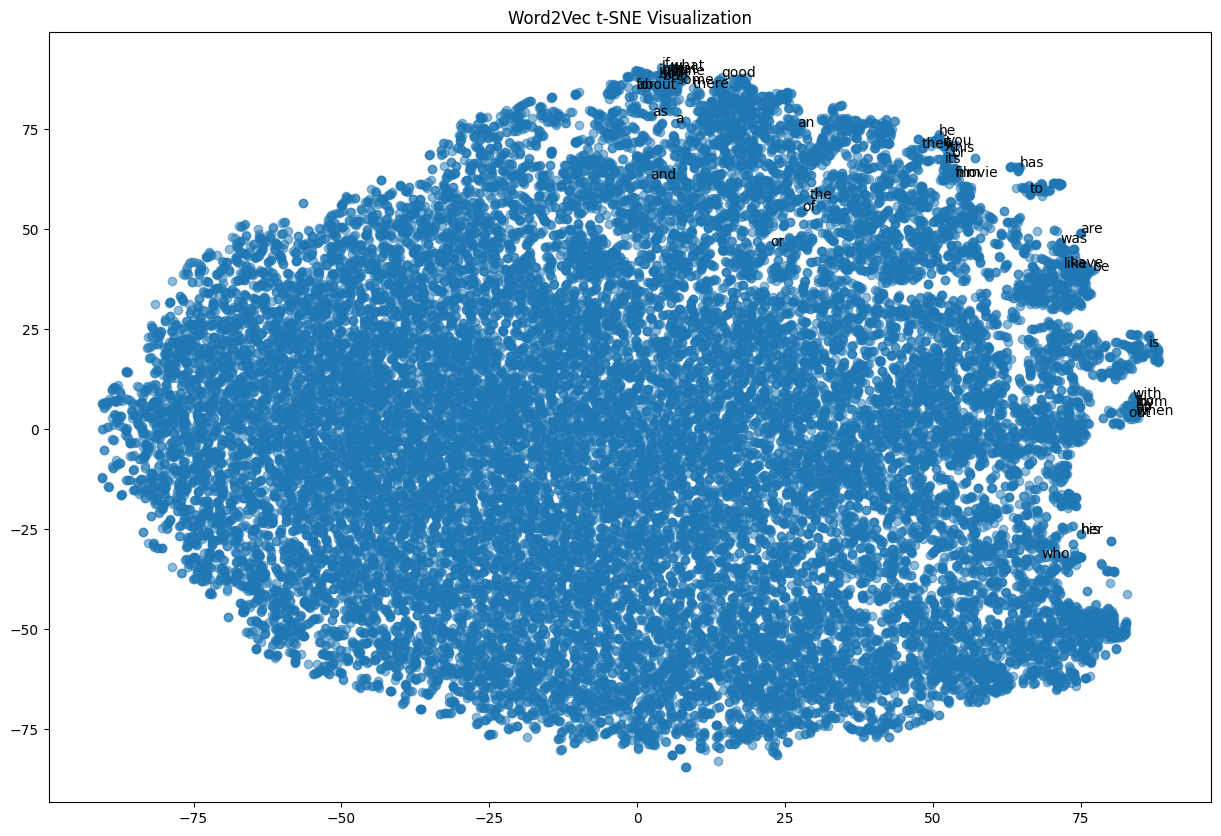

Words similar to 'good': [('however', 0.9340698719024658), ('generous', 0.9192851781845093), ('bad', 0.9096378684043884), ('decent', 0.8920406103134155), ('yes', 0.885215163230896)]
Words similar to 'bad': [('sad', 0.9560858607292175), ('scary', 0.9494955539703369), ('yes', 0.9349218606948853), ('funny', 0.9240105152130127), ('ok', 0.9226365089416504)]
Words similar to 'movie': [('film', 0.959757387638092), ('least', 0.9403318762779236), ('thing', 0.9396181702613831), ('word', 0.9080840945243835), ('fact', 0.9049659967422485)]
Words similar to 'actor': [('actress', 0.9792534112930298), ('role', 0.9377884268760681), ('comedian', 0.9133282899856567), ('performance', 0.9076288342475891), ('choice', 0.8865072727203369)]


In [8]:
# Problem 7: (Advance assignment) Vector Visualization
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Getting vocabulary and vectors
words = list(model.wv.key_to_index.keys())
vectors = model.wv[words]

# Reducing dimensions with t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
vectors_tsne = tsne.fit_transform(vectors)

# Plotting
plt.figure(figsize=(15, 10))
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1], alpha=0.5)

# Annotating some words
for i, word in enumerate(words[:50]):  # Plot first 50 words
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))

plt.title("Word2Vec t-SNE Visualization")
plt.show()

# Finding similar words
test_words = ['good', 'bad', 'movie', 'actor']
for word in test_words:
    if word in model.wv:
        similar = model.wv.most_similar(word, topn=5)
        print(f"Words similar to '{word}': {similar}")
    else:
        print(f"'{word}' not in vocabulary")

In [11]:
# Issue 8: (Advance assignment) Classification of movie reviews using Word2Vec
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Function to get document vector by averaging word vectors
def get_document_vector(words, model):
    vectors = []
    for word in words:
        if word in model.wv:
            vectors.append(model.wv[word])
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Creating feature vectors for all documents
x_train_vec = np.array([get_document_vector(doc, model) for doc in processed_corpus])
x_test_vec = np.array([get_document_vector(preprocess_text(str(text)), model) for text in x_test])

# Training classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(x_train_vec, y_train)

# Evaluating
y_pred = classifier.predict(x_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print("Classification accuracy:", accuracy)

Classification accuracy: 0.657
